In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Path setup
PROJECT = Path("C:/Users/Admin/Desktop/Projects/turbofan-health-explorer")
PROC = PROJECT / "data" / "processed"
REPORTS = PROJECT / "reports"
REPORTS.mkdir(exist_ok=True)

# Load the processed dataset
df = pd.read_parquet(PROC / "train_FD001_small.parquet")

print("Rows:", len(df))
print("Columns:", df.columns.tolist()[:10], "...")
df.head()


Rows: 20631
Columns: ['unit', 'cycle', 'op1', 'op2', 'op3', 's2', 's3', 's4', 's7', 's8'] ...


,unit,cycle,op1,op2,op3,s2,s3,s4,s7,s8
0,1,1,-0.0007,-0.0004,100.0,641.820007,1589.699951,1400.599976,554.359985,2388.060059
1,1,2,0.0019,-0.0003,100.0,642.150024,1591.819946,1403.140015,553.750000,2388.040039
2,1,3,-0.0043,0.0003,100.0,642.349976,1587.989990,1404.199951,554.260010,2388.080078
3,1,4,0.0007,0.0000,100.0,642.349976,1582.790039,1401.869995,554.450012,2388.110107
4,1,5,-0.0019,-0.0002,100.0,642.369995,1582.849976,1406.219971,554.000000,2388.060059


In [2]:
# Basic metadata
n_units = df["unit"].nunique()
cycles_per_unit = df.groupby("unit")["cycle"].agg(["min", "max", "count"])

print(f"Unique engines: {n_units}")
print("Cycles per engine (first 5):")
display(cycles_per_unit.head())

print("Overall cycle range:", df["cycle"].min(), "to", df["cycle"].max())
print("Missing values per column:")
display(df.isna().sum())


Unique engines: 100
Cycles per engine (first 5):


,min,max,count
unit,,,
1,1,192,192
2,1,287,287
3,1,179,179
4,1,189,189
5,1,269,269


Overall cycle range: 1 to 362
Missing values per column:


unit     0
cycle    0
op1      0
op2      0
op3      0
s2       0
s3       0
s4       0
s7       0
s8       0
dtype: int64

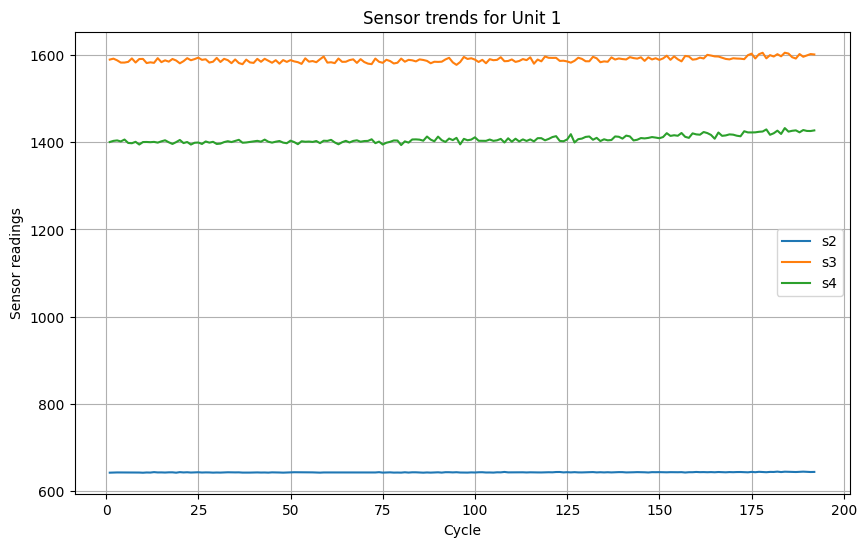

In [3]:
sensors_to_plot = ["s2", "s3", "s4"]
unit_id = 1  # pick one engine to inspect

df_unit = df[df["unit"] == unit_id]

plt.figure(figsize=(10, 6))
for s in sensors_to_plot:
    plt.plot(df_unit["cycle"], df_unit[s], label=s)

plt.xlabel("Cycle")
plt.ylabel("Sensor readings")
plt.title(f"Sensor trends for Unit {unit_id}")
plt.legend()
plt.grid(True)
plt.show()


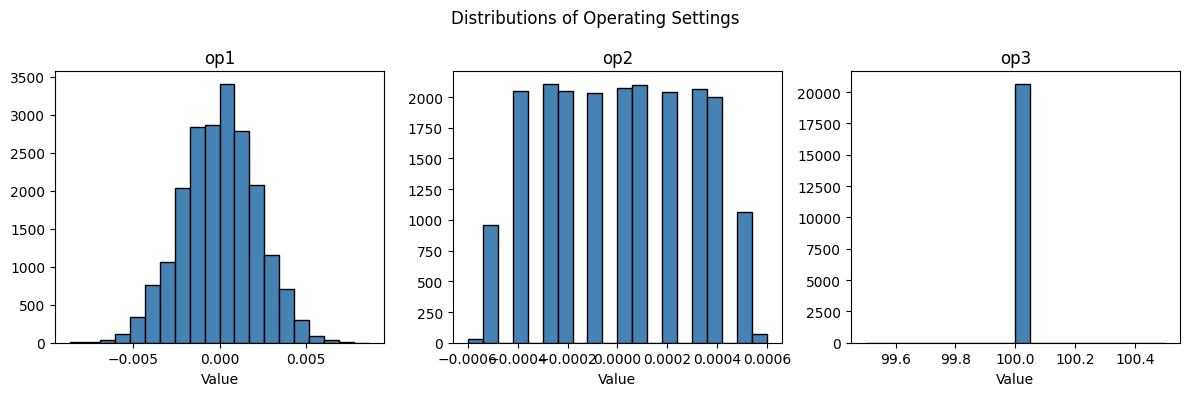

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, op in enumerate(["op1", "op2", "op3"]):
    axes[i].hist(df[op], bins=20, color="steelblue", edgecolor="k")
    axes[i].set_title(op)
    axes[i].set_xlabel("Value")

plt.suptitle("Distributions of Operating Settings")
plt.tight_layout()
plt.show()


Plot saved to: C:\Users\Admin\Desktop\Projects\turbofan-health-explorer\reports\sensor_trends_unit1.png


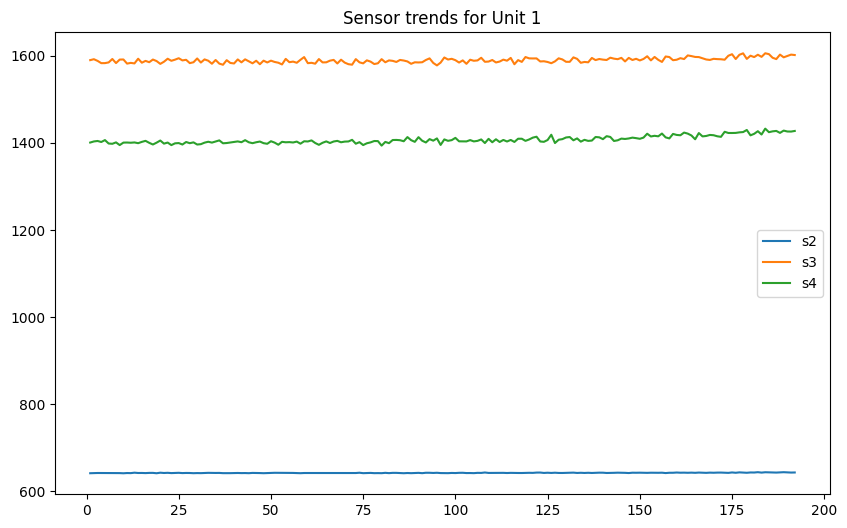

In [5]:
fig_path = REPORTS / "sensor_trends_unit1.png"
plt.figure(figsize=(10, 6))
for s in sensors_to_plot:
    plt.plot(df_unit["cycle"], df_unit[s], label=s)
plt.legend()
plt.title("Sensor trends for Unit 1")
plt.savefig(fig_path, dpi=150, bbox_inches="tight")
print("Plot saved to:", fig_path)

In [6]:
print("EDA Checks")
print("- Cycles monotonic per unit:", df.groupby("unit")["cycle"].apply(lambda x: x.is_monotonic_increasing).all())
print("- Any missing values:", df.isna().any().any())
print("- Sensor range sanity:")
print(df.describe().loc[["min", "max"]].T.head(10))

EDA Checks
- Cycles monotonic per unit: True
- Any missing values: False
- Sensor range sanity:
               min          max
unit      1.000000   100.000000
cycle     1.000000   362.000000
op1      -0.008700     0.008700
op2      -0.000600     0.000600
op3     100.000000   100.000000
s2      641.210022   644.530029
s3     1571.040039  1616.910034
s4     1382.250000  1441.489990
s7      549.849976   556.059998
s8     2387.899902  2388.560059


Analysis:
